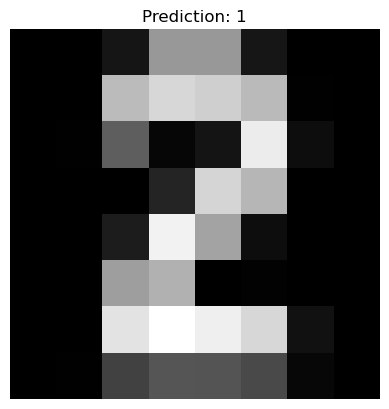

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

from PIL import Image

# Preparación de la imagen personalizada
custom_image = Image.open('2.jpg')
custom_image = custom_image.resize((8, 8))  # Redimensiona a 8x8 píxeles si es necesario
custom_image = custom_image.convert("L")  # Convierte a escala de grises si es necesario
custom_data = list(custom_image.getdata())

# Creación del clasificador SVM
clf = svm.SVC(gamma=0.001)

# Cargar el conjunto de datos MNIST
digits = datasets.load_digits()
data = digits.images.reshape((len(digits.images), -1))
target = digits.target

# Entrenar el clasificador con los datos de MNIST
clf.fit(data, target)

# Predecir el dígito de la imagen personalizada
predicted_digit = clf.predict([custom_data])

# Visualizar la imagen personalizada y la predicción
_, ax = plt.subplots()
ax.set_axis_off()
ax.imshow(custom_image, cmap=plt.cm.gray_r, interpolation="nearest")
ax.set_title(f"Prediction: {predicted_digit[0]}")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el conjunto de datos de letras
dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

# Preprocesamiento de los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

# Definir la arquitectura del modelo
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=10, batch_size=32)

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')